In [1]:
#importing library
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/home/anonymous/Downloads/root2ai - Data.csv')

## EDA

In [3]:
df.isnull().sum()
df.dropna(inplace=True)

In [4]:
df.reset_index(inplace=True)

In [5]:
df.drop('index',axis=1,inplace=True)

In [6]:
df.Target.value_counts()

FinTech             8551
Cyber Security      2640
Bigdata             2267
Reg Tech            2206
credit reporting    1748
Blockchain          1375
Neobanks            1069
Microservices        974
Stock Trading        787
Robo Advising        737
Data Security        347
Name: Target, dtype: int64

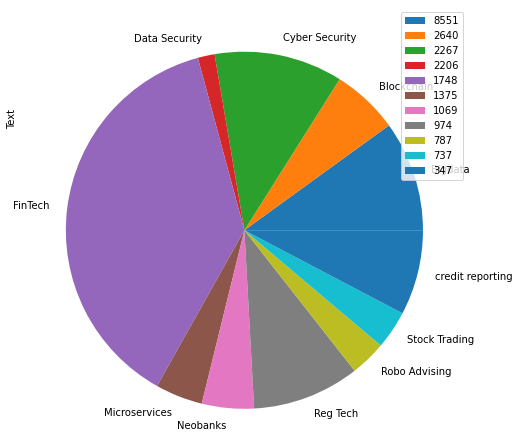

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8,6))
df.groupby('Target').Text.count().plot.pie(ylim=0)
plt.legend(df.Target.value_counts())
plt.show()

In [8]:
#defining dependent and independent
X=df['Text']
Y=df['Target']

## count vectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
c_vect= CountVectorizer()

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [12]:
c_vect = CountVectorizer(stop_words='english',max_df=0.7)
c_X_train = c_vect.fit_transform(X_train)
c_X_test = c_vect.transform(X_test.apply(lambda x: np.str_(X)))

In [13]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier()
clf.fit(c_X_train,Y_train)

PassiveAggressiveClassifier()

In [44]:
#accuracy on training data
from sklearn import metrics
from sklearn.metrics import accuracy_score
X_train_pred=clf.predict(c_X_train)
c_X_train_pred_acc=accuracy_score(X_train_pred,Y_train)
print("Model accuracy:   %0.3f" % c_X_train_pred_acc)

Model accuracy:   0.911


In [45]:
#accuracy on test data
X_test_pred=clf.predict(c_X_test)
c_X_test_pred_acc=accuracy_score(X_test_pred,Y_test)
print("Test accuracy:   %0.3f" % c_X_test_pred_acc)

Test accuracy:   0.097


In [46]:
Y_pred = clf.predict(c_X_test)
c_score = accuracy_score(Y_test,Y_pred)
print("Train accuracy:   %0.3f" % c_score)

Train accuracy:   0.097


## TfidfVectorizer

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tf_vect = TfidfVectorizer()

In [19]:
t_vect = TfidfVectorizer(stop_words='english',max_df=0.7)
t_X_train = t_vect.fit_transform(X_train)
t_X_test = t_vect.transform(X_test.apply(lambda x: np.str_(X)))

In [20]:
t_X_train.shape

(18160, 10301)

In [21]:
t_clf = PassiveAggressiveClassifier()
t_clf.fit(t_X_train,Y_train)

PassiveAggressiveClassifier()

In [43]:
#accuracy on training data
from sklearn import metrics
from sklearn.metrics import accuracy_score
X_train_pred=t_clf.predict(t_X_train)
t_X_train_pred_acc=accuracy_score(X_train_pred,Y_train)
print("Train accuracy:   %0.3f" % t_X_train_pred_acc)

Train accuracy:   0.938


In [42]:
#accuracy on test data
X_test_pred=t_clf.predict(t_X_test)
t_X_test_pred_acc=accuracy_score(X_test_pred,Y_test)
print("Test accuracy:   %0.3f" % t_X_test_pred_acc)

Test accuracy:   0.097


In [41]:
Y_pred = t_clf.predict(t_X_test)
t_score = accuracy_score(Y_test,Y_pred)
print("Model accuracy:   %0.3f" % t_score)

Model accuracy:   0.097


In [40]:
data={'countvectorize':[c_X_train_pred_acc,c_X_test_pred_acc,c_score],'Tfidvectorize':[t_X_train_pred_acc,t_X_test_pred_acc,t_score]}
pd.DataFrame(data, index=['Train', 'Test', 'Model'])

,countvectorize,Tfidvectorize
Train,0.910683,0.938436
Test,0.097335,0.097335
Model,0.097335,0.097335
